# API

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
url = r"https://data.baltimorecity.gov/resource/9agw-sxsr.json"

In [3]:
response = requests.get(url)

In [4]:
response.status_code

200

In [5]:
data311 = response.json()

In [6]:
type(data311)

list

In [7]:
len(data311)

1000

In [8]:
type(data311[0])

dict

In [9]:
data311[0]

{'srrecordid': '5004M00000epHJ3QAM',
 'servicerequestnum': '20-00584331',
 'srtype': 'SW-Rat Rubout Proactive',
 'methodreceived': 'System',
 'createddate': '2020-08-27T09:00:05.000',
 'srstatus': 'Closed',
 'statusdate': '2020-08-27T09:00:20.000',
 'duedate': '2020-09-03T09:00:05.000',
 'closedate': '2020-08-27T09:00:22.000',
 'agency': 'Solid Waste',
 'address': '1923 N ROSEDALE ST, Baltimore City, 21216',
 'zipcode': '21216',
 'neighborhood': 'Walbrook',
 'councildistrict': '7',
 'policedistrict': 'Southwestern',
 'latitude': '39.309960377284780',
 'longitude': '-76.669123791746980',
 'geolocation': {'latitude': '39.30996037728478',
  'longitude': '-76.66912379174698'},
 ':@computed_region_gwq4_fjxs': '43',
 ':@computed_region_5kre_ccpb': '246',
 ':@computed_region_s6p5_2pgr': '27297'}

In [10]:
data311[1]

{'srrecordid': '5004M00000epH4eQAE',
 'servicerequestnum': '20-00584330',
 'srtype': 'SW-Recycling',
 'methodreceived': 'Phone',
 'createddate': '2020-08-27T08:59:55.000',
 'srstatus': 'New',
 'statusdate': '2020-08-27T08:59:55.000',
 'duedate': '2020-08-28T08:59:55.000',
 'agency': 'Solid Waste',
 'address': '6201 BILTMORE AVE, Baltimore City, 21215',
 'zipcode': '21215',
 'neighborhood': 'Glen',
 'councildistrict': '5',
 'policedistrict': 'Northwestern',
 'latitude': '39.357240279908800',
 'longitude': '-76.693388851978500',
 'geolocation': {'latitude': '39.3572402799088',
  'longitude': '-76.6933888519785'},
 ':@computed_region_gwq4_fjxs': '241',
 ':@computed_region_5kre_ccpb': '89',
 ':@computed_region_s6p5_2pgr': '27295'}

In [11]:
data311[0].keys()

dict_keys(['srrecordid', 'servicerequestnum', 'srtype', 'methodreceived', 'createddate', 'srstatus', 'statusdate', 'duedate', 'closedate', 'agency', 'address', 'zipcode', 'neighborhood', 'councildistrict', 'policedistrict', 'latitude', 'longitude', 'geolocation', ':@computed_region_gwq4_fjxs', ':@computed_region_5kre_ccpb', ':@computed_region_s6p5_2pgr'])

In [12]:
data311[1].keys()

dict_keys(['srrecordid', 'servicerequestnum', 'srtype', 'methodreceived', 'createddate', 'srstatus', 'statusdate', 'duedate', 'agency', 'address', 'zipcode', 'neighborhood', 'councildistrict', 'policedistrict', 'latitude', 'longitude', 'geolocation', ':@computed_region_gwq4_fjxs', ':@computed_region_5kre_ccpb', ':@computed_region_s6p5_2pgr'])

In [13]:
data311[0]['srrecordid']

'5004M00000epHJ3QAM'

In [14]:
type(data311[0])

dict

In [15]:
info311 = str(data311[0].keys())

In [16]:
dict_info = {'srtype':[],
              'methodreceived':[],
              'createddate':[],
              'duedate':[],
             'closedate':[],
             'statusdate':[],
              'agency':[],
              'lastactivity':[],
              'neighborhood':[],
              'councildistrict':[],
              'policedistrict':[],
              'zipcode':[],
              'srstatus':[]
             
             }

style_name = []
style_descr = []

In [17]:
for data in data311:
    
    for key in dict_info.keys():
        try:
            dict_info[key].append(data[key])
        except KeyError:
            dict_info[key].append(np.nan)    
    try:
        style_name.append(data['style']['name'])
    except KeyError:
            style_name.append(np.nan)
            
    try:
        style_descr.append(data['style']['description'])
    except KeyError:
            style_descr.append(np.nan)

## Dataframe (TIME)

In [18]:
dict1_info = { 
              'createddate':[],
              'duedate':[],
             'closedate':[],
             'statusdate':[]
             
             }

style_name = []
style_descr = []

In [19]:
for data in data311:
    
    for key in dict1_info.keys():
        try:
            dict1_info[key].append(data[key])
        except KeyError:
            dict1_info[key].append(np.nan)    
    try:
        style_name.append(data['style']['name'])
    except KeyError:
            style_name.append(np.nan)
            
    try:
        style_descr.append(data['style']['description'])
    except KeyError:
            style_descr.append(np.nan)

In [20]:
timedata_df = pd.DataFrame(data=dict1_info)
timedata_df.head()

,createddate,duedate,closedate,statusdate
0,2020-08-27T09:00:05.000,2020-09-03T09:00:05.000,2020-08-27T09:00:22.000,2020-08-27T09:00:20.000
1,2020-08-27T08:59:55.000,2020-08-28T08:59:55.000,NaN,2020-08-27T08:59:55.000
2,2020-08-27T08:59:54.000,2020-08-27T04:59:54.000,2020-08-27T09:00:02.000,2020-08-27T08:59:54.000
3,2020-08-27T08:59:40.000,2020-09-03T08:59:40.000,2020-08-27T08:59:56.000,2020-08-27T08:59:55.000
4,2020-08-27T08:59:36.000,2020-10-09T08:59:36.000,NaN,2020-08-27T08:59:36.000


# Dataframe

In [21]:
data_df = pd.DataFrame(data=dict_info)
data_df.head(100)

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus
0,SW-Rat Rubout Proactive,System,2020-08-27T09:00:05.000,2020-09-03T09:00:05.000,2020-08-27T09:00:22.000,2020-08-27T09:00:20.000,Solid Waste,NaN,Walbrook,7,Southwestern,21216,Closed
1,SW-Recycling,Phone,2020-08-27T08:59:55.000,2020-08-28T08:59:55.000,NaN,2020-08-27T08:59:55.000,Solid Waste,NaN,Glen,5,Northwestern,21215,New
2,ECC-Information Request,Phone,2020-08-27T08:59:54.000,2020-08-27T04:59:54.000,2020-08-27T09:00:02.000,2020-08-27T08:59:54.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed
3,SW-Rat Rubout Proactive,System,2020-08-27T08:59:40.000,2020-09-03T08:59:40.000,2020-08-27T08:59:56.000,2020-08-27T08:59:55.000,Solid Waste,NaN,Walbrook,7,Southwestern,21216,Closed
4,FCPF-Trial Request-Red Light,Mail,2020-08-27T08:59:36.000,2020-10-09T08:59:36.000,NaN,2020-08-27T08:59:36.000,Finance,NaN,Downtown,11,Central,21202,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SW-Rat Rubout Proactive,System,2020-08-27T08:50:34.000,2020-09-03T08:50:34.000,2020-08-27T08:50:50.000,2020-08-27T08:50:49.000,Solid Waste,NaN,Armistead Gardens,2,Northeastern,21205,Closed
96,SW-Recycling,Phone,2020-08-27T08:50:25.000,2020-08-28T08:50:25.000,NaN,2020-08-27T08:50:25.000,Solid Waste,NaN,Frankford,2,Northeastern,21206,New
97,FCCS-Paid Wrong Account/Misapplied Payment,Phone,2020-08-27T08:50:20.000,2020-11-26T07:50:20.000,NaN,2020-08-27T08:50:20.000,Finance,NaN,Perring Loch,3,Northeastern,21239,New
98,SW-Rat Rubout Proactive,System,2020-08-27T08:50:18.000,2020-09-03T08:50:18.000,2020-08-27T08:50:35.000,2020-08-27T08:50:34.000,Solid Waste,NaN,Walbrook,7,Southwestern,21216,Closed


#  Data Analysis

In [22]:
data_df.dtypes

srtype             object
methodreceived     object
createddate        object
duedate            object
closedate          object
statusdate         object
agency             object
lastactivity       object
neighborhood       object
councildistrict    object
policedistrict     object
zipcode            object
srstatus           object
dtype: object

In [25]:
data_df.describe(include = "all")

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus
count,1000,1000,1000,1000,621,1000,1000,309,723,723,723,730,1000
unique,76,5,941,982,586,957,11,4,153,14,9,30,11
top,SW-Rat Rubout Proactive,Phone,2020-08-26T22:33:25.000,2020-09-03T08:21:53.000,2020-08-27T08:12:01.000,2020-08-27T08:37:01.000,Solid Waste,Service Response,Waltherson,2,Northeastern,21206,Closed
freq,289,471,3,3,3,3,491,305,71,122,238,126,615


In [29]:
data_df.isnull().sum()

srtype               0
methodreceived       0
createddate          0
duedate              0
closedate          379
statusdate           0
agency               0
lastactivity       691
neighborhood       277
councildistrict    277
policedistrict     277
zipcode            270
srstatus             0
dtype: int64

In [30]:
data_df.shape

(1000, 13)

## Data Wrangling

In [31]:
data_df['createddate'].replace(np.nan, 0,inplace=True)

In [34]:
data_df['createddate'] = pd.to_datetime(data_df['createddate'], format='%Y-%m-%d %H:%M:%S')

In [35]:
data_df['duedate'] = pd.to_datetime(data_df['duedate'], format='%Y-%m-%d %H:%M:%S')

In [36]:
data_df['closedate'] = pd.to_datetime(data_df['closedate'], format='%Y-%m-%d %H:%M:%S')

In [37]:
data_df['actual_time_spent'] = data_df['closedate'] - data_df['createddate'] 

In [38]:
data_df['expected_time_spent'] = data_df['duedate'] - data_df['createddate']

In [74]:
data_df.head()

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus,actual_time_spent,expected_time_spent,exp_t
0,SW-Rat Rubout Proactive,System,2020-08-27 09:00:05,2020-09-03 09:00:05,2020-08-27 09:00:22,2020-08-27T09:00:20.000,Solid Waste,NaN,Walbrook,7,Southwestern,21216,Closed,00:00:17,7 days 00:00:00,0 7 days 00:00:00\n1 1 days 00:00:...
1,SW-Recycling,Phone,2020-08-27 08:59:55,2020-08-28 08:59:55,NaT,2020-08-27T08:59:55.000,Solid Waste,NaN,Glen,5,Northwestern,21215,New,00:11:28.835748,1 days 00:00:00,0 7 days 00:00:00\n1 1 days 00:00:...
2,ECC-Information Request,Phone,2020-08-27 08:59:54,2020-08-27 04:59:54,2020-08-27 09:00:02,2020-08-27T08:59:54.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed,00:00:08,-1 days +20:00:00,0 7 days 00:00:00\n1 1 days 00:00:...
3,SW-Rat Rubout Proactive,System,2020-08-27 08:59:40,2020-09-03 08:59:40,2020-08-27 08:59:56,2020-08-27T08:59:55.000,Solid Waste,NaN,Walbrook,7,Southwestern,21216,Closed,00:00:16,7 days 00:00:00,0 7 days 00:00:00\n1 1 days 00:00:...
4,FCPF-Trial Request-Red Light,Mail,2020-08-27 08:59:36,2020-10-09 08:59:36,NaT,2020-08-27T08:59:36.000,Finance,NaN,Downtown,11,Central,21202,New,00:11:28.835748,43 days 00:00:00,0 7 days 00:00:00\n1 1 days 00:00:...


In [41]:
data_df.describe(include = "all")

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus,actual_time_spent,expected_time_spent
count,1000,1000,1000,1000,621,1000,1000,309,723,723,723,730,1000,621,1000
unique,76,5,941,982,586,957,11,4,153,14,9,30,11,NaN,NaN
top,SW-Rat Rubout Proactive,Phone,2020-08-27 08:21:53,2020-09-03 08:21:53,2020-08-26 22:00:07,2020-08-27T08:37:01.000,Solid Waste,Service Response,Waltherson,2,Northeastern,21206,Closed,NaN,NaN
freq,289,471,3,3,3,3,491,305,71,122,238,126,615,NaN,NaN
first,NaN,NaN,2020-08-26 20:17:08,2020-08-26 16:18:19,2020-08-26 20:19:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-08-27 09:00:05,2021-08-11 09:24:49,2020-08-27 09:00:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:11:28.835748,10 days 19:17:51.943000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:56:25.970026,27 days 22:33:39.265621
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:07,-1 days +20:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:16,0 days 23:59:59


In [43]:
mean1=data_df['actual_time_spent'].mean()
data_df['actual_time_spent'].replace(np.nan,mean1, inplace=True)

In [44]:
mean2=data_df['expected_time_spent'].mean()
data_df['expected_time_spent'].replace(np.nan,mean2, inplace=True)

In [45]:
data_df.isnull().sum()

srtype                   0
methodreceived           0
createddate              0
duedate                  0
closedate              379
statusdate               0
agency                   0
lastactivity           691
neighborhood           277
councildistrict        277
policedistrict         277
zipcode                270
srstatus                 0
actual_time_spent        0
expected_time_spent      0
dtype: int64

In [49]:
sdata_df = data_df.dropna()
sdata_df.head()

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus,actual_time_spent,expected_time_spent
566,SW-Rat Rubout Proactive,System,2020-08-27 07:56:00,2020-09-03 07:56:00,2020-08-27 07:56:17,2020-08-27T07:56:15.000,Solid Waste,Service Response,Waltherson,3,Northeastern,21206,Closed,00:00:17,7 days
573,SW-Rat Rubout Proactive,System,2020-08-27 07:53:42,2020-09-03 07:53:42,2020-08-27 07:53:56,2020-08-27T07:53:55.000,Solid Waste,Service Response,Waltherson,3,Northeastern,21206,Closed,00:00:14,7 days
574,SW-Rat Rubout Proactive,System,2020-08-27 07:53:24,2020-09-03 07:53:24,2020-08-27 07:53:42,2020-08-27T07:53:41.000,Solid Waste,Service Response,Waltherson,3,Northeastern,21206,Closed,00:00:18,7 days
579,HLTH-Animal Aggressive Animal,Phone,2020-08-27 07:51:08,2020-09-03 07:51:08,2020-08-27 08:39:46,2020-08-27T08:39:45.000,Health,Service Response,Waltherson,3,Northeastern,21206,Closed,00:48:38,7 days
581,SW-Rat Rubout Proactive,System,2020-08-27 07:50:43,2020-09-03 07:50:43,2020-08-27 07:50:59,2020-08-27T07:50:57.000,Solid Waste,Service Response,Waltherson,3,Northeastern,21206,Closed,00:00:16,7 days


In [50]:
sdata_df.shape

(50, 15)

In [51]:
sdata_df.describe()

,actual_time_spent,expected_time_spent
count,50,50
mean,0 days 01:52:15.280000,4 days 12:26:30.380000
std,0 days 02:35:48.161916,3 days 03:22:04.456273
min,0 days 00:00:14,-1 days +20:00:00
25%,0 days 00:12:12,2 days 00:00:00
50%,0 days 00:40:42,4 days 00:00:00
75%,0 days 01:59:02.250000,7 days 00:00:00
max,0 days 08:29:08,12 days 00:00:00


In [60]:
sdata_df['neighborhood'].value_counts().to_frame()

,neighborhood
Waltherson,12
Frankford,3
Cedmont,3
Madison-Eastend,3
Cherry Hill,2
New Southwest/Mount Clare,2
Irvington,2
Bolton Hill,2
Canton Industrial Area,2
Parklane,1


# Visualization

In [53]:
import seaborn as sns

Text(0.5, 1.0, 'Requests by Police District')

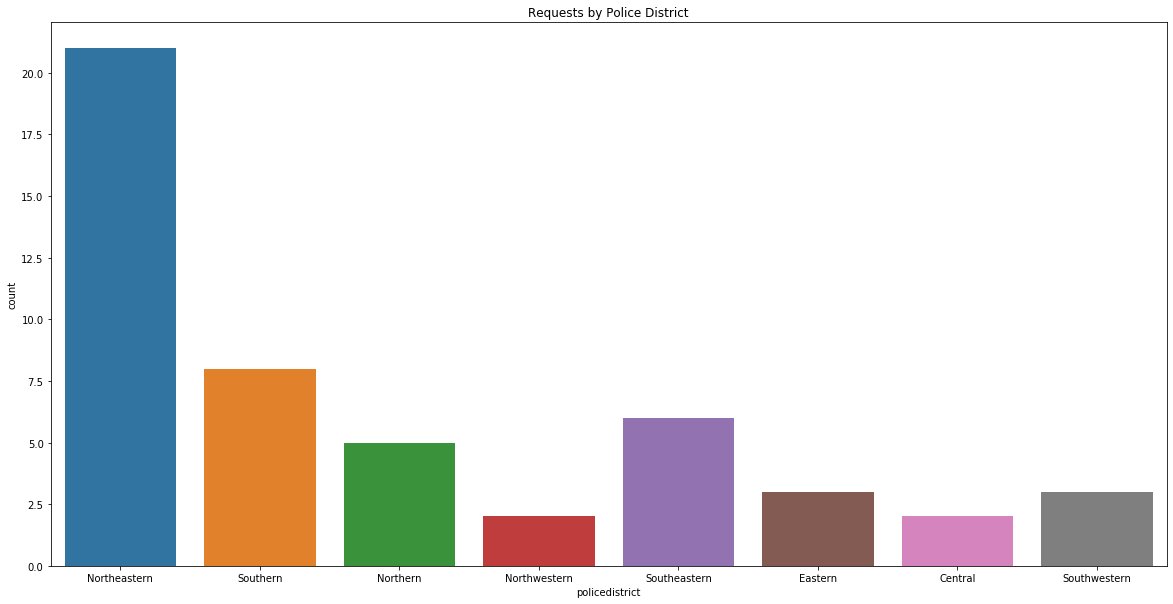

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(x=sdata_df['policedistrict'])
plt.title('Requests by Police District')

Text(0.5, 1.0, 'Requests by Neighborhood')

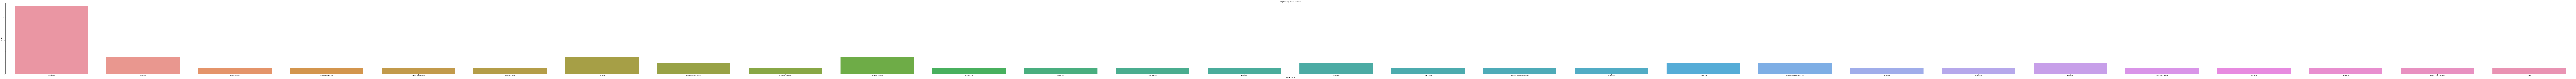

In [55]:
plt.figure(figsize=(350,10))
sns.countplot(x=sdata_df['neighborhood'])
plt.title('Requests by Neighborhood')

Text(0.5, 1.0, 'Requests by Council District')

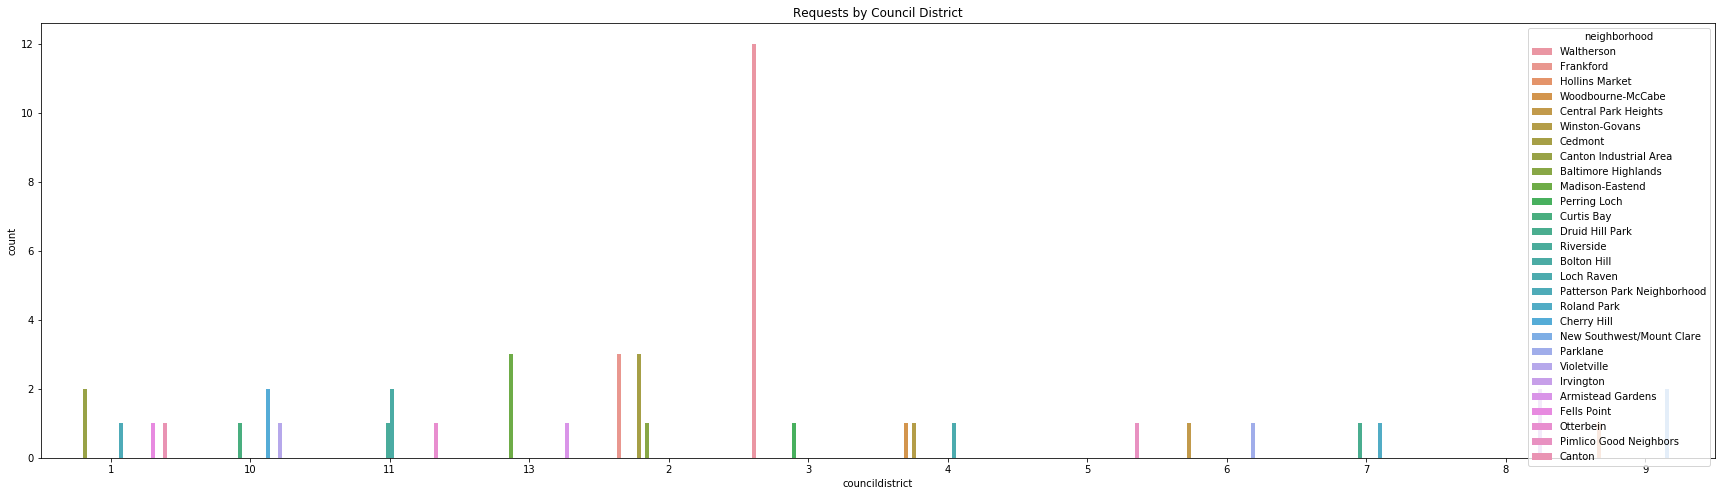

In [64]:
plt.figure(figsize=(30,8))
sns.countplot(x=sdata_df['councildistrict'], hue = sdata_df["neighborhood"])
plt.title('Requests by Council District')

Text(0.5, 1.0, 'Requests by Agency')

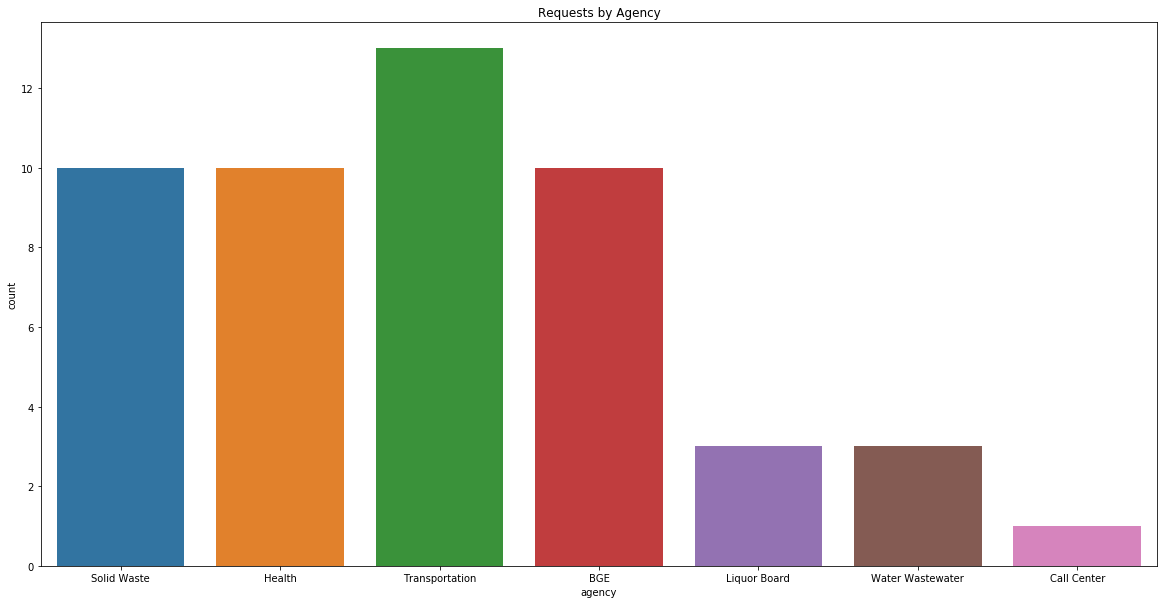

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(x=sdata_df['agency'])
plt.title('Requests by Agency')